# Методы оптимизации. Даниил Меркулов. Метод Ньютона

## Ньютон к нам приходит или 2 способа получить метод Ньютона
### Метод Ньютона поиска действительных корней уравнения
Рассмотрим функцию $\varphi(x): \mathbb{R} \to \mathbb{R}$. Пусть есть уравнение $\varphi(x^*) = 0$. Рассмотрим линейную аппроксимацию функции $\varphi(x)$ вблизи решения ($x^* - x = \Delta x$):
$$
\varphi(x^*) = \varphi(x + \Delta x) \approx \varphi(x) + \varphi'(x)\Delta x
$$
Получаем приближенное уравнение:
$$
\varphi(x) + \varphi'(x)\Delta x = 0
$$
Можно полагать, что решение уравнения $\Delta x = - \dfrac{\varphi(x)}{\varphi'(x)}$ будет близко к оптимальному $\Delta x^* = x^* - x$. 

Получаем итеративную схему:
$$
x_{k+1} = x_k - \dfrac{\varphi(x_k)}{\varphi'(x_k)}
$$
![](newton_1.png)

Эти рассуждения можно применить к задаче безусловной минимизации функции $f(x)$, записав необходимое условие экстремума:
$$
f'(x^*) = 0
$$
Здесь $\varphi(x) = f'(x) \;\;\;\; \varphi'(x) = f''(x)$. Таким образом, мы получаем метод оптимизации Ньютона в его классическом виде:
$$
\boxed{x_{k+1} = x_k - \left[ f''(x_k)\right]^{-1}f'(x_k)}
$$
С тем лишь уточнением, что в многомерном случае: $x \in \mathbb{R}^n, \; f'(x) = \nabla f(x) \in \mathbb{R}^n, \; f''(x) = \nabla^2 f(x) \in \mathbb{R}^{n \times n}$

### Квадратичная аппроксимация минимизируемой функции
Пусть теперь нам дана функция $f(x)$ и некая точка $x_k$. Рассмотрим квадратичную аппроксимацию этой функции вблизи $x_k$:
$$
\tilde{f}(x) = f(x_k) + \langle f'(x_k), x - x_k\rangle + \frac{1}{2} \langle f''(x_k)(x-x_k), x-x_k \rangle 
$$

Идея метода заключается в поиске точки $x_{k+1}$, минимизирующей функцию $\tilde{f}(x)$, т.е. $\nabla \tilde{f}(x_{k+1}) = 0$
![](newton.png)
\begin{align*}
\nabla \tilde{f}(x_{k+1}) &= f'(x_{k}) + f''(x+{k+1})(x_{k+1} - x_k) = 0 \\
f''(x+{k})(x_{k+1} - x_k) &= -f'(x_{k}) \\
\left[ f''(x_k)\right]^{-1} f''(x+{k})(x_{k+1} - x_k) &= -\left[ f''(x_k)\right]^{-1} f'(x_{k}) \\
x_{k+1}  &= x_k -\left[ f''(x_k)\right]^{-1} f'(x_{k})
\end{align*}

Сразу же отметим ограничения, связанные с необходимостью невырожденности гессиана (для того, чтобы метод существовал), а так же его положительной определенности (для того, чтобы метод сходился).

## Скорость сходимости метода Ньютона
Попробуем получить оценку того, как быстро сходится классический метод Ньютона. Необходимые данные и константы постараемся вводить по мере необходимости в выводе (дабы проиллюстрировать методологию получения таких оценок)

\begin{align*}
x_{k+1} - x^* = x_k -\left[ f''(x_k)\right]^{-1} f'(x_{k}) - x^* = x_k - x^* -\left[ f''(x_k)\right]^{-1} f'(x_{k}) = \\
= x_k - x^* - \left[ f''(x_k)\right]^{-1} \int_0^1 f''(x^* + \tau (x_k - x^*)) (x_k - x^*) d\tau = \\
=  \left( 1 - \left[ f''(x_k)\right]^{-1} \int_0^1 f''(x^* + \tau (x_k - x^*)) d \tau\right) (x_k - x^*)= \\
=  \left[ f''(x_k)\right]^{-1} \left(  f''(x_k) - \int_0^1 f''(x^* + \tau (x_k - x^*)) d \tau\right) (x_k - x^*) = \\
=  \left[ f''(x_k)\right]^{-1} \left( \int_0^1 \left( f''(x_k) - f''(x^* + \tau (x_k - x^*)) d \tau\right)\right) (x_k - x^*)= \\
= \left[ f''(x_k)\right]^{-1} G_k (x_k - x^*)
\end{align*}

Здесь использовано обозначение: $G_k = \int_0^1 \left( f''(x_k) - f''(x^* + \tau (x_k - x^*)) d \tau\right)$. Попробуем оценить размер $G_k$:
\begin{align*}
\| G_k\| = \left\| \int_0^1 \left( f''(x_k) - f''(x^* + \tau (x_k - x^*)) d \tau\right)\right\| \leq \\
\leq \int_0^1 \left\| f''(x_k) - f''(x^* + \tau (x_k - x^*))  \right\|d\tau \leq \qquad \text{ (Липшициевость Гессиана)}\\
\leq \int_0^1 M\|x_k - x^* - \tau (x_k - x^*)\| d \tau = \int_0^1 M\|x_k - x^*\|(1- \tau)d \tau = \frac{r_k}{2}M
\end{align*}

Здесь использовано обозначение: $r_k = \| x_k - x^* \|$

Таким образом, имеем:
$$
r_{k+1} \leq \left\|\left[ f''(x_k)\right]^{-1}\right\| \cdot \frac{r_k}{2}M \cdot r_k
$$
Квадратичной сходимостью уже пахнет. Осталось лишь оценить величину обратного Гессиана.

В силу Липшициевости и симметричности Гессиана:
\begin{align*}
f''(x_k) - f''(x^*) \succeq - Mr_k I_n \\
f''(x_k)  \succeq f''(x^*) - Mr_k I_n \\
f''(x_k)  \succeq l I_n - Mr_k I_n \\
f''(x_k)  \succeq (l - Mr_k )I_n \\
\end{align*}
Значит, (здесь уже стоит сильно ограничить необходимость быть $f''(x_k) \succ 0$ для таких оценок, т.е. $r_k < \frac{l}{M}$)
\begin{align*}
\left\|\left[ f''(x_k)\right]^{-1}\right\| \leq (l - Mr_k)^{-1}
\end{align*}

Итого, имеем:
$$
r_{k+1} \leq \dfrac{r_k^2 M}{2(l - Mr_k)}
$$
Условие сходимости $r_{k+1} < r_k$ накладывает дополнительные условия на $r_k: \;\;\; r_k < \frac{2 l}{3M}$

Таким образом, мы получили важный результат: метод Ньютона для функции с Липшициевым положительным гессианом сходится квадратично недалеко ($\| x_0 - x^* < \frac{2 l}{3M}\|$) от решения с **квадратичной скоростью**. 

### Теорема 
Пусть $f(x)$ - сильно выпуклая дважды непрерывно дифференцируемая функция на $\mathbb{R}^n$, для второй производной которой выполняются неравенства: $l I_n\preceq f''(x) \preceq L  I_n $. Тогда метод Ньютона с постоянным шагом локально сходится к решению задачи со сверхлинейной скоростью. Если, кроме того, гессиан Липшициев, то данный метод сходится локально к $x^*$ с квадратичной скоростью.

## Exploration
Рассмотрим несколько интересных особенностей метода Ньютона. Для начала применим его к функции 
$$
f(x) = x^4
$$

In [15]:
%%capture
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
import seaborn
plt.rcParams["animation.html"] = "html5"
from pylab import rcParams
rcParams['figure.figsize'] = 13, 7
import numpy as np

x_min, x_max = -1, 1
y_min, y_max = 0, 2
N_iter = 20
x_0 = 1

fig, ax = plt.subplots()
xdata = np.linspace(x_min,x_max)
ydata = xdata**4
plt.plot(xdata, ydata)
plt.title('Сходимость метода Ньютона для y = x**4')
plt.xlabel('x')
plt.ylabel('f(x) = x**4')
line, = ax.plot([], [], marker='o', linestyle='-', color='r', label='Newton', lw=2)
plt.legend()
# ax.grid()
xdata, ydata = [x_0], [x_0**4]

def data_gen(t=0):
    cnt = 0
    x = x_0
    while cnt < N_iter:
        cnt += 1
        x = 2/3*x
        yield x


def init():
    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    line.set_data(xdata, ydata)
    return line,

def run(data):
    # update the data
    x = data
    y = x**4
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
    return line,

ani = matplotlib.animation.FuncAnimation(fig, run, data_gen, blit=False, interval=1000,
                              repeat=True, init_func=init)

In [16]:
ani

Вроде ничего, скажете Вы. Но давайте взглянем на скорость сходимости:

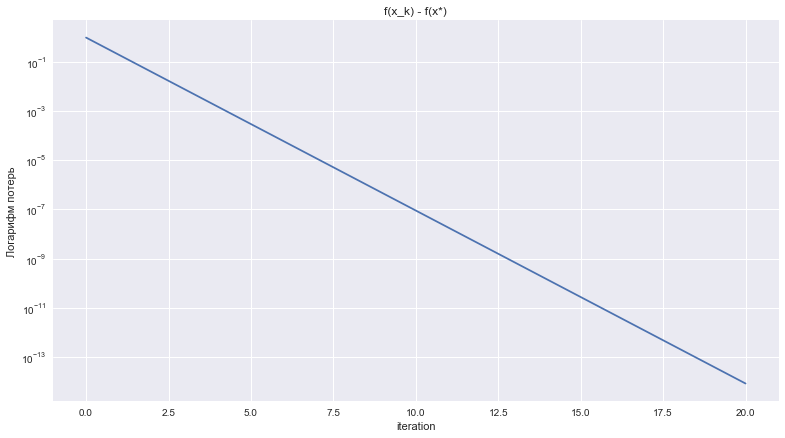

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 13, 7
plt.semilogy(ydata)
plt.title('f(x_k) - f(x*)')
plt.xlabel('iteration')
plt.ylabel('Логарифм потерь')

ОНА ЛИНЕЙНА!!!!! Проблема в том, что не выполняется условие невырожденности Гессиана в точке $x^* :\;\;\;\; f(x^*) = f(0) = 0$ 

Давайте рассмотрим функцию
$$
f(x) = \sqrt{1 + x^2}
$$

In [38]:
%%capture
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
plt.rcParams["animation.html"] = "html5"
from pylab import rcParams
rcParams['figure.figsize'] = 13, 7
import numpy as np

x_min, x_max = -3, 3
y_min, y_max = 1, 3
N_iter = 15
x_0 = 0.999



fig, ax = plt.subplots()
xdata = np.linspace(x_min,x_max)
ydata = np.sqrt(1 + xdata**2)
plt.plot(xdata, ydata)
plt.title('Сходимость метода Ньютона для y = sqrt(1 + x**2) ')
plt.xlabel('x')
plt.ylabel('f(x)')
line, = ax.plot([], [], marker='o', linestyle='-', color='r', label='Newton', lw=2)
plt.legend()
# ax.grid()
xdata, ydata = [x_0], [np.sqrt(1 + x_0**2)]

def data_gen(t=0):
    cnt = 0
    x = x_0
    while cnt < N_iter:
        cnt += 1
        x = -x**3
        yield x


def init():
    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    line.set_data(xdata, ydata)
    return line,

def run(data):
    # update the data
    x = data
    y = np.sqrt(1 + x**2)
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
    return line,

ani = matplotlib.animation.FuncAnimation(fig, run, data_gen, blit=False, interval=1000,
                              repeat=True, init_func=init)

In [39]:
ani

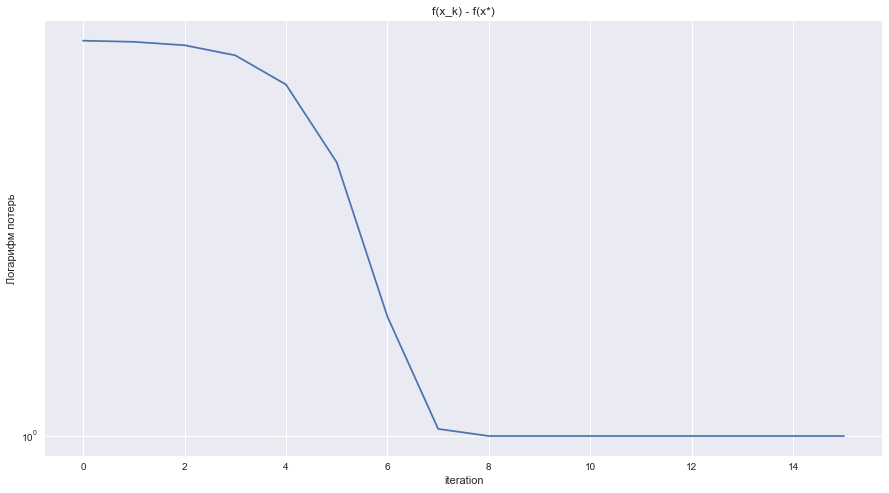

In [40]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
plt.semilogy(ydata)
plt.title('f(x_k) - f(x*)')
plt.xlabel('iteration')
plt.ylabel('Логарифм потерь')

Вроде все норм. Но попробуйте поменять $x_0$ на любое число по модулю превышающее единицу:)

Далее написан код на побаловаться:)

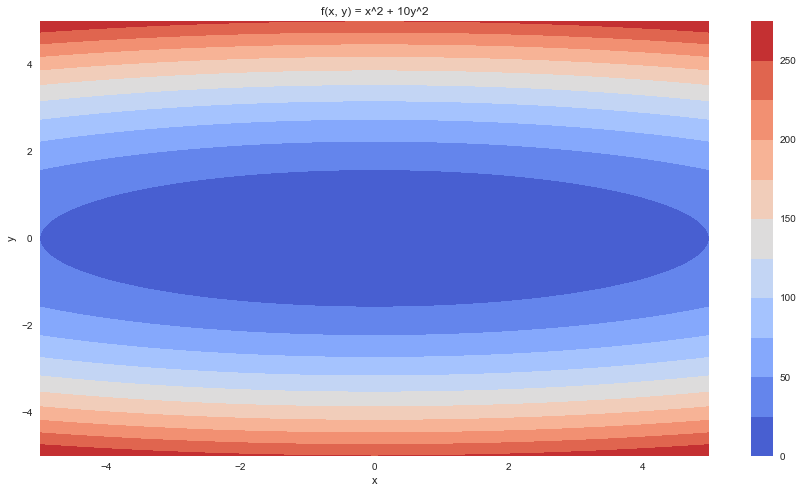

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
xlist = np.linspace(-5.0, 5.0, 100)
ylist = np.linspace(-5.0, 5.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = X**2 + 10*Y**2

cp = plt.contourf(X, Y, Z, 10, cmap = 'coolwarm')
plt.colorbar(cp, cmap = 'coolwarm')
plt.title('f(x, y) = x^2 + 10y^2')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import autograd.numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad, value_and_grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest
from functools import partial

In [46]:
f  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

In [47]:
xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = f(x, y)

In [48]:
# It is known
minima = np.array([3., .5])

In [49]:
f(*minima)

0.0

In [52]:
minima_ = minima.reshape(-1, 1)
minima_

array([[ 3. ],
       [ 0.5]])

In [53]:
f(*minima_)

array([ 0.])

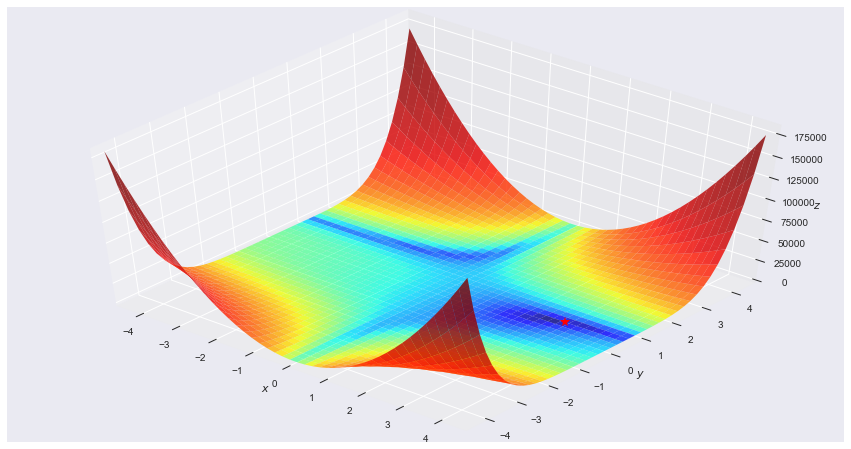

In [54]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

In [63]:
x0 = np.array([-2., 3.])

In [70]:
func = value_and_grad(lambda args: f(*args))

In [71]:
res = minimize(func, x0=x0, method='BFGS',
               jac=True, tol=1e-20, callback=print)

[-1.55327139  2.09416693]
[-3.36336408  1.18333637]
[-3.23472931  1.24392585]
[-3.23067403  1.24588333]
[-3.24098713  1.24455175]
[-3.25931052  1.24287055]
[-3.29351244  1.2401672 ]
[-3.35928555  1.23542433]
[-3.48793527  1.22682147]
[-3.73778841  1.21156819]
[-3.90740189  1.20358707]
[-4.11783669  1.19610798]
[-4.5367393  1.1827692]
[-5.27163364  1.15789588]
[-5.83477171  1.14835514]
[-6.32614734  1.13610237]
[-7.11049093  1.12113537]
[-7.52001668  1.11753583]
[-8.69736981  1.1011093 ]
[-9.03633723  1.09991323]
[-10.48387741   1.0852881 ]
[-10.57432224   1.08641297]
[-11.8126905    1.07748659]
[-12.47116396   1.07332108]
[-13.2624446    1.06940087]
[-14.5403009    1.06399873]
[-15.53465537   1.05961596]
[-16.47050232   1.05659927]
[-17.79973783   1.05296731]
[-18.5156709    1.05066936]
[-19.44507318   1.04828112]
[-20.70676485   1.04559319]
[-22.49926794   1.0421115 ]
[-24.57817069   1.03915977]
[-26.01979171   1.03670321]
[-26.89502      1.03537365]
[-27.75024711   1.03431018]
[-28.8

[ -4.90717492e+03   1.00020188e+00]
[ -4.97212922e+03   1.00019924e+00]
[ -5.04138492e+03   1.00019659e+00]
[ -5.10717601e+03   1.00019399e+00]
[ -5.13221383e+03   1.00019302e+00]
[ -5.15076267e+03   1.00019232e+00]
[ -5.17700591e+03   1.00019136e+00]
[ -5.23664112e+03   1.00018918e+00]
[ -5.30987246e+03   1.00018659e+00]
[ -5.35927662e+03   1.00018484e+00]
[ -5.40278663e+03   1.00018336e+00]
[ -5.46188194e+03   1.00018141e+00]
[ -5.49916836e+03   1.00018015e+00]
[ -5.55251140e+03   1.00017840e+00]
[ -5.59750302e+03   1.00017698e+00]
[ -5.65718362e+03   1.00017515e+00]
[ -5.69513216e+03   1.00017396e+00]
[ -5.74778845e+03   1.00017234e+00]
[ -5.79623640e+03   1.00017091e+00]
[ -5.85787188e+03   1.00016915e+00]
[ -5.89783023e+03   1.00016798e+00]
[ -5.95696171e+03   1.00016629e+00]
[ -5.99864673e+03   1.00016515e+00]
[ -6.06675727e+03   1.00016331e+00]
[ -6.10989421e+03   1.00016215e+00]
[ -6.15826380e+03   1.00016089e+00]
[ -6.20395848e+03   1.00015969e+00]
[ -6.26128041e+03   1.000158

In [72]:
dict(res)

{'fun': 0.45213363380192045,
 'hess_inv': array([[  1.65088289e+10,   1.09706932e+02],
        [  1.09706932e+02,   7.29413576e-07]]),
 'jac': array([  3.48374726e-07,  -5.13702796e+01]),
 'message': 'Maximum number of iterations has been exceeded.',
 'nfev': 508,
 'nit': 400,
 'njev': 508,
 'status': 1,
 'success': False,
 'x': array([ -1.22669103e+04,   1.00008077e+00])}

In [73]:
def make_minimize_cb(path=[]):
    
    def minimize_cb(xk):
        # note that we make a deep copy of xk
        path.append(np.copy(xk))

    return minimize_cb

path_ = [x0]

res = minimize(func, x0=x0, method='Newton-CG',
               jac=True, tol=1e-20, callback=make_minimize_cb(path_))
dict(res)

{'fun': 0.4725355425930894,
 'jac': array([  8.37232994e-04,  -3.17685639e+00]),
 'message': "Warning: CG iterations didn't converge.  The Hessian is not positive definite.",
 'nfev': 182,
 'nhev': 0,
 'nit': 103,
 'njev': 822,
 'status': 3,
 'success': False,
 'x': array([-73.96861788,   1.01324023])}

In [74]:
path = np.array(path_).T
path.shape

(2, 104)

(-4.5, 4.5)

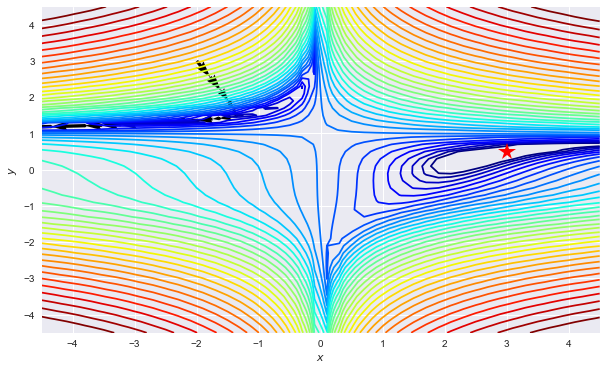

In [75]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

## Резюме
Приятно:

* квадратичная сходимость вблизи решения
* аффинная инвариантность
* параметры слабо влияют на скорость сходимости

Неприятно:

* необходимо хранить гессиан на каждой итерации: $O(n^2)$ памяти
* необходимо решать линейные системы: $O(n^3)$ операций
* гессиан может оказаться вырожден
* гессиан может не быть положительно определён $\to$ направление $-(f''(x))^{-1}f'(x)$ может не быть направлением убывания

## Возможные направления 
* Демпфированный метод Ньютона (длина шага варьируется)
* Квазиньютоновские методы (не вычисляем гессиан, а строим его оценку - BFGS)
* Квадратичная оценка функции по оракулу первого порядка (суперлинейная сходимость)
* Комбинация метода Ньютона и градиентного спуска (интересное открытое направление)
* Методы более высоких порядков (скорее всего, бесполезняк)

In [219]:
# Stylish cell, better to compile at the beginning
from IPython.html.services.config import ConfigManager
from IPython.utils.path import locate_profile
cm = ConfigManager(profile_dir=locate_profile(get_ipython().profile))
cm.update('livereveal', {
              'fontsize': 4,
              'theme': 'simple_cyr',
              'transition': 'zoom',
              'start_slideshow_at': 'selected',
              'height': '724',
              'scroll': True,
              'slideNumber': True
})


from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
css_styling()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: locate_profile has moved to the IPython.paths module since IPython 4.0.
  after removing the cwd from sys.path.
